In [63]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize,MinMaxScaler,StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from fbprophet import Prophet

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re

# Machine learning

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

import catboost
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestRegressor,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from catboost import CatBoostClassifier, Pool, cv
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Let's be rebels and ignore warnings for now
import warnings

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [64]:
df=pd.read_csv('D:\\Data Science\\Sales-Analysis-Time-Series-Forecasting-using-FBprophet-\\dataset.csv')
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time Date,1080.0,1.567207e+07,8.791548e+06,1.012018e+06,8.069518e+06,15567019.0,2.308452e+07,3.112202e+07
Product,1080.0,2.667437e+06,0.000000e+00,2.667437e+06,2.667437e+06,2667437.0,2.667437e+06,2.667437e+06
Value,1080.0,4.048117e+03,1.439946e+03,2.042813e+03,2.632499e+03,4256.0,5.288249e+03,8.147740e+03


In [66]:
df.Store.unique()

array(['QLD_CW_ST0203'], dtype=object)

In [67]:
df.Product.unique()

array([2667437], dtype=int64)

In [68]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [69]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [70]:
df['Year']=df['Time Date'].apply(lambda x: str(x)[3:] if len(str(x))==7 else str(x)[4:])
df['Month']=df['Time Date'].apply(lambda x:str(x)[1:3] if len(str(x))==7 else str(x)[2:4])
df['Day']=df['Time Date'].apply(lambda x: str(x)[:1] if len(str(x))==7 else str(x)[:2])
df['ds']=pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [71]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [72]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [73]:
df.drop(['Time Date','Product','Store','Year','Month','Day'],axis=1,inplace=True)

In [74]:
df.columns=['y','ds']

In [75]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [76]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

In [77]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.247091,760.841581,3939.886795,3040.247091,3040.247091,-646.597572,-646.597572,-646.597572,462.88359,462.88359,462.88359,16.640885,16.640885,16.640885,-1126.122047,-1126.122047,-1126.122047,0.0,0.0,0.0,2393.649520
1,2018-01-02,3041.046114,762.898682,3965.549902,3041.046114,3041.046114,-656.604183,-656.604183,-656.604183,462.88359,462.88359,462.88359,-11.264507,-11.264507,-11.264507,-1108.223267,-1108.223267,-1108.223267,0.0,0.0,0.0,2384.441931
2,2018-01-03,3041.845137,755.639707,3936.959185,3041.845137,3041.845137,-630.652280,-630.652280,-630.652280,462.88359,462.88359,462.88359,-4.394889,-4.394889,-4.394889,-1089.140981,-1089.140981,-1089.140981,0.0,0.0,0.0,2411.192857
3,2018-01-04,3042.644160,917.432067,4045.013048,3042.644160,3042.644160,-583.601820,-583.601820,-583.601820,462.88359,462.88359,462.88359,22.467835,22.467835,22.467835,-1068.953246,-1068.953246,-1068.953246,0.0,0.0,0.0,2459.042339
4,2018-01-05,3043.443182,859.965684,4121.952615,3043.443182,3043.443182,-619.500386,-619.500386,-619.500386,462.88359,462.88359,462.88359,-34.593205,-34.593205,-34.593205,-1047.790771,-1047.790771,-1047.790771,0.0,0.0,0.0,2423.942797


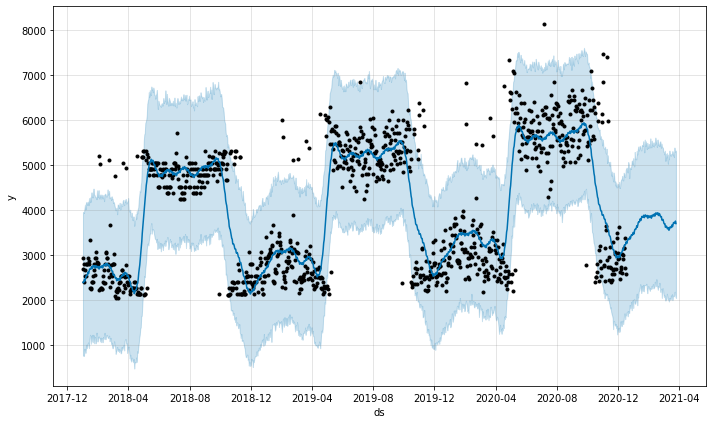

In [78]:
plot1 = m.plot(forecast)

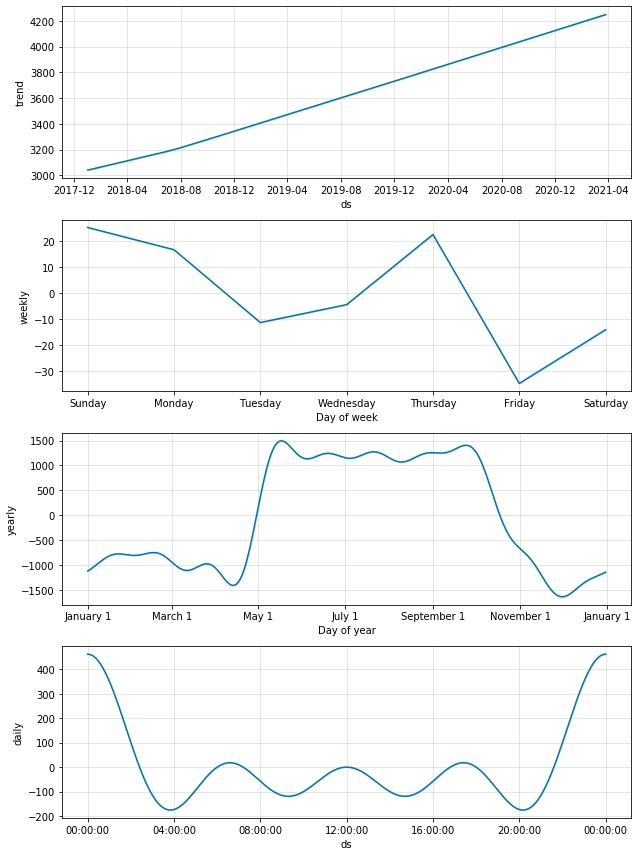

In [79]:
plot2 = m.plot_components(forecast)